In [16]:
from pdfminer.pdfinterp import PDFResourceManager, process_pdf
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from io import StringIO
from io import open
from urllib.request import urlopen
import re
import os

In [17]:
def read_pdf_file(pdfFile):
    pdfrm = PDFResourceManager()
    strio = StringIO()
    lapa = LAParams()
    device = TextConverter(pdfrm, strio, laparams = lapa)
    
    process_pdf(pdfrm, device, pdfFile)
    device.close()
    
    content = strio.getvalue()
    strio.close()
    return content

In [18]:
pdf_samsung = open("social/KT.pdf", "rb")
a = read_pdf_file(pdf_samsung)
pdf_samsung.close() 

pdf_skens = open("social/SK텔레콤.pdf", "rb")
b = read_pdf_file(pdf_skens)
pdf_skens.close()

pdf_skens = open("social/SK하이닉스.pdf", "rb")
c = read_pdf_file(pdf_skens)
pdf_skens.close()

pdf_skens = open("social/삼성전자.pdf", "rb")
d = read_pdf_file(pdf_skens)
pdf_skens.close()

pdf_skens = open("social/포스코.pdf", "rb")
e = read_pdf_file(pdf_skens)
pdf_skens.close()

In [19]:
from konlpy.tag import Mecab
mecab = Mecab()

tokens = []
def word_token (x) :
    for token in mecab.pos(x):
        tokens.append(token)
    return tokens

word_token(a)
word_token(b)
word_token(c)
word_token(d)
word_token(e)

[('본', 'MM'),
 ('보고서', 'NNG'),
 ('는', 'JX'),
 ('친환경', 'NNG'),
 ('용지', 'NNG'),
 ('에', 'JKB'),
 ('콩기름', 'NNG'),
 ('잉크', 'NNG'),
 ('로', 'JKB'),
 ('인쇄', 'NNG'),
 ('되', 'XSV'),
 ('었', 'EP'),
 ('습니다', 'EF'),
 ('.', 'SF'),
 ('', 'SY'),
 ('', 'SY'),
 ('2', 'SN'),
 ('Overview', 'SL'),
 ('Environmental', 'SL'),
 ('Social', 'SL'),
 ('Governance', 'SL'),
 ('Appendix', 'SL'),
 ('3', 'SN'),
 ('About', 'SL'),
 ('This', 'SL'),
 ('Report', 'SL'),
 ('KT', 'SL'),
 ('가', 'JKS'),
 ('매년', 'MAG'),
 ('발간', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETM'),
 ('열', 'NR'),
 ('여섯', 'NR'),
 ('번', 'NNBC'),
 ('째', 'XSN'),
 ('보고서', 'NNG'),
 ('로써', 'JKB'),
 ('보', 'VV'),
 ('고', 'EC'),
 ('서명', 'NNG'),
 ('을', 'JKO'),
 ('기존', 'NNG'),
 ('의', 'JKG'),
 ('‘', 'SY'),
 ('KT', 'SL'),
 ('통합', 'NNG'),
 ('보고서', 'NNG'),
 ('’', 'SY'),
 ('에서', 'JKB'),
 ("'", 'SY'),
 ('KT', 'SL'),
 ('ESG', 'SL'),
 ('보고서', 'NNG'),
 ("'", 'SY'),
 ('로', 'JKB'),
 ('변경', 'NNG'),
 ('하', 'XSV'),
 ('여', 'EC'),
 ('발간', 'NNG'),
 ('하', 'XSV'),
 ('게', 'EC'),
 ('되', 'VV'),
 ('었

In [20]:
from konlpy.tag import Mecab
mecab = Mecab()
stop = ["회사", "에서", "위해", "관련", "기준"]
# tokens = [token for token in mecab.pos(samsung_display)]

nodes = [t[0] for t in tokens]
vocab = [t[0] for t in tokens if t[0] not in stop if t[1] in ['NNG', 'NNP'] and len(t[0]) > 1]

print(nodes[:10])
print(vocab[:10])


['본', '보고서', '는', '친환경', '용지', '에', '콩기름', '잉크', '로', '인쇄']
['보고서', '친환경', '용지', '콩기름', '잉크', '인쇄', '발간', '보고서', '서명', '기존']


In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

count = Counter(vocab)
words = dict(count.most_common())

In [22]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)


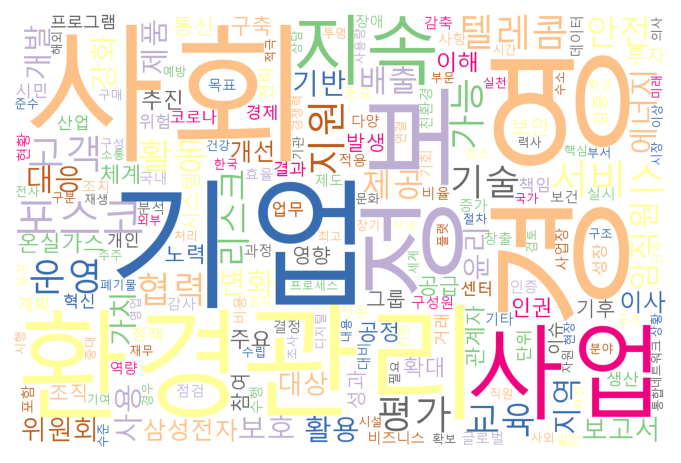

In [23]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", 
                      width=1500, height=1000).generate_from_frequencies(words) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

In [24]:
vocab = list(set(vocab))

vocab2idx = {vocab[i]:i for i in range(len(vocab))}
idx2vocab = {i:vocab[i] for i in range(len(vocab))}

In [25]:
import numpy as np
import math

vocab_len = len(vocab2idx)

# 토큰별로 그래프 edge를 Matrix 형태로 생성
weighted_edge = np.zeros((vocab_len,vocab_len),dtype=np.float32)

# 각 토큰 노드별로 스코어 1로 초기화
score = np.ones((vocab_len),dtype=np.float32)

# coocurrence를 판단하기 위한 window 사이즈 설정
window_size = 4
covered_coocurrences = []

for window_start in range(len(nodes) - window_size + 1):
    window = nodes[window_start:window_start+window_size]
    for i in range(window_size):
        for j in range(i+1, window_size):
            if window[i] in vocab and window[j] in vocab:
                index_i = window_start + i
                index_j = window_start + j

                if (index_i, index_j) not in covered_coocurrences:
                    weighted_edge[vocab2idx[window[i]]][vocab2idx[window[j]]] = 1
                    weighted_edge[vocab2idx[window[j]]][vocab2idx[window[i]]] = 1
                    covered_coocurrences.append((index_i, index_j))

for i in range(vocab_len):
    row_sum = weighted_edge[i].sum()
    weighted_edge[i] = weighted_edge[i]/row_sum if row_sum > 0 else 0

MAX_ITERATIONS = 50
d=0.85
threshold = 0.0001 #convergence threshold

for iter in range(MAX_ITERATIONS):
    prev_score = np.copy(score)

    for i in range(vocab_len):
        summation = 0
        for j in range(vocab_len):
            if weighted_edge[j][i] != 0:
                summation += weighted_edge[j][i] * prev_score[j]

        score[i] = (1 - d) * d*summation

    if np.sum(np.fabs(prev_score -  score)) <= threshold:
        break


sorted_index = np.flip(np.argsort(score), 0)

n = 50


print("\n=== 핵심키워드 ===")
for i in range(0,n):
    print(str(idx2vocab[sorted_index[i]])+" : " + str(score[sorted_index[i]]))


=== 핵심키워드 ===
사업 : 3.216559e-08
지원 : 3.1949533e-08
포스코 : 3.1022875e-08
사회 : 3.0729737e-08
기업 : 3.0288902e-08
관리 : 2.9691332e-08
서비스 : 2.9087738e-08
운영 : 2.9004685e-08
정보 : 2.8848621e-08
경영 : 2.7080244e-08
교육 : 2.6722773e-08
환경 : 2.6533828e-08
고객 : 2.6006742e-08
기술 : 2.5629872e-08
활동 : 2.4530076e-08
대상 : 2.4046408e-08
텔레콤 : 2.3965525e-08
지역 : 2.3411248e-08
협력 : 2.3244368e-08
임직원 : 2.2506743e-08
평가 : 2.2277078e-08
개발 : 2.1875882e-08
지속 : 2.184868e-08
가능 : 2.170851e-08
안전 : 2.159232e-08
제공 : 2.1583395e-08
기반 : 2.1388281e-08
주요 : 2.1180348e-08
활용 : 2.0547182e-08
사용 : 2.008903e-08
개선 : 1.9643052e-08
제품 : 1.9516353e-08
다양 : 1.9103178e-08
강화 : 1.8619945e-08
확대 : 1.838379e-08
공정 : 1.8270894e-08
리스크 : 1.818893e-08
삼성전자 : 1.7904629e-08
보호 : 1.781209e-08
대응 : 1.7561272e-08
발생 : 1.6225819e-08
업무 : 1.6091622e-08
에너지 : 1.6070626e-08
통신 : 1.6047077e-08
시스템 : 1.60435e-08
센터 : 1.564571e-08
그룹 : 1.5530393e-08
프로그램 : 1.552889e-08
구축 : 1.5417292e-08
보안 : 1.5122595e-08


In [26]:
w = []
v = []
for i in range(0, 5000) :
    w.append(str(idx2vocab[sorted_index[i]]))
    v.append(str(score[sorted_index[i]]))

In [27]:
import pandas as pd
environment_df = pd.DataFrame({"keyword" : w,  "score" : v})
environment_df.astype({"score" : float})
environment_df.to_csv("social_top5.csv")

In [28]:
keyword = []
for i in range(0,15):
    keyword.append(str(idx2vocab[sorted_index[i]]))
    
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

n_topic = 3

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(keyword)
svd = TruncatedSVD(n_components=n_topic, n_iter=100)

U = svd.fit_transform(tfidf)
Vt = svd.components_

vocab = tfidf_vect.get_feature_names()
print(vocab)
n = 3
for i, topic in enumerate(Vt):
    print("Topic {}".format(i), [ (vocab[i], topic[i], round(3)) for i in topic.argsort()[:-n-1:-1]])

['경영', '고객', '관리', '교육', '기술', '기업', '사업', '사회', '서비스', '운영', '정보', '지원', '포스코', '환경', '활동']
Topic 0 [('교육', 0.48329793399252297, 3), ('사회', 0.24485557456828796, 3), ('포스코', 0.20339174553170553, 3)]
Topic 1 [('관리', 0.5931866100095523, 3), ('교육', 0.4735329490785752, 3), ('사회', 0.3999609489636933, 3)]
Topic 2 [('사업', 0.5448681827882981, 3), ('사회', 0.36885911099587887, 3), ('기술', 0.25978581015081464, 3)]


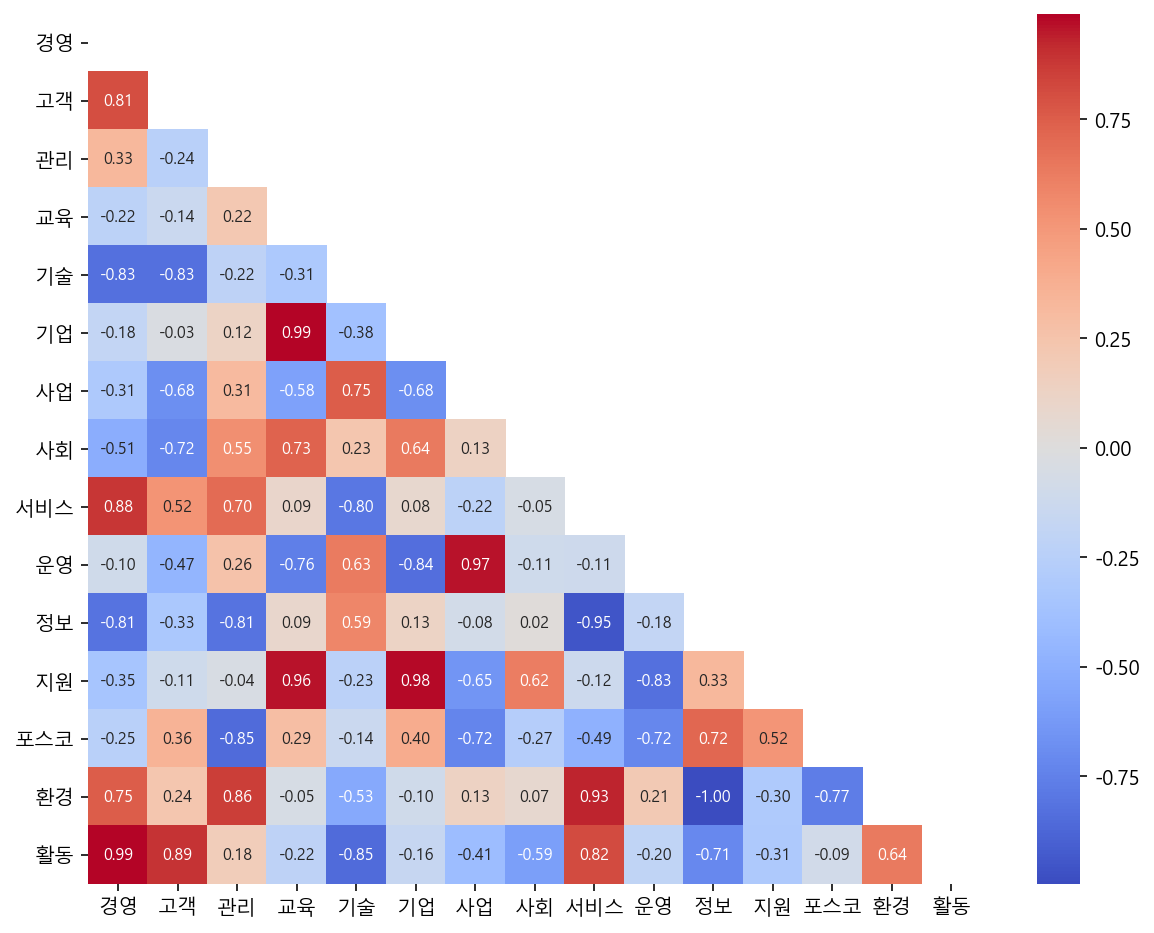

In [29]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def calc_simiarlty_matrix(vectors):
    def consine_similarity(a,b):
        return dot(a,b)/(norm(a)*norm(b))
    
    n_word = len(vectors)
    similarity_matrix = np.zeros((n_word, n_word))
    
    for i in range(n_word):
        for j in range(n_word):
            similarity_matrix[j, i] = consine_similarity(vectors[i], vectors[j]).round(4)

    return similarity_matrix

word_vectors = Vt.T
word_similarity_matrix = calc_simiarlty_matrix(word_vectors)

import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity(similarity_matrix, label):
    mask = np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
    plt.rcParams['figure.figsize'] = [10, 8]
    plt.rc('font', family='Malgun Gothic')
    ax = sns.heatmap(similarity_matrix, mask=mask, xticklabels=label, yticklabels=label,
                     annot=True, fmt=".2f", annot_kws={"size":8},cmap="coolwarm")
    
visualize_similarity(word_similarity_matrix, vocab)

In [ ]:
+